In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [2]:
#df in hance of google
df = pd.read_csv('HistoricalPrices.csv', index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-04,524.9,525.0,521.0,523.1,269148.0
2022-08-03,526.0,526.0,522.0,523.7,210016.0
2022-08-02,522.1,523.6,521.1,521.8,230101.0
2022-08-01,529.6,529.6,522.5,523.7,101294.0
2022-07-28,518.0,518.0,510.0,514.5,67678.0


In [3]:
df.columns

Index([' Open', ' High', ' Low', ' Close', ' Volume'], dtype='object')

In [4]:
df.rename(
    columns={" Open":"Open",
                " High":"High", " Low":"Low",  " Close":"Close", " Volume":"Volume"
            }
          ,inplace=True)

In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

C:\Users\Shadin\AppData\Local\Temp/ipykernel_16848/3810282122.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df['2013':'2022'].plot(subplots=True, figsize=(10,12))


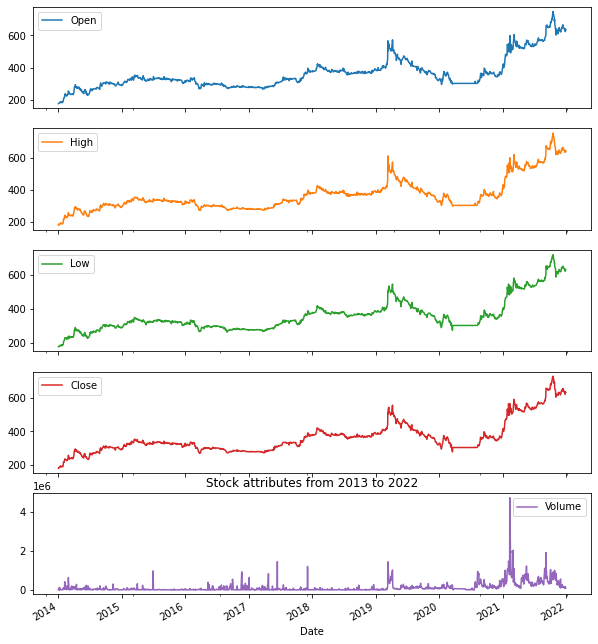

In [6]:
df['2013':'2022'].plot(subplots=True, figsize=(10,12))
plt.title('Stock attributes from 2013 to 2022')
#plt.savefig('stocks.png')
plt.show()

In [7]:
# Creating a Timestamp
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [8]:
# Creating a period
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [9]:
# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

In [10]:
# Converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

In [11]:
# Converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

#Using date_range

In [12]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [13]:
# Creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [14]:
#Creating a datetimeindex without specifying start date and using periods
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [15]:
# Creating a datetimeindex specifying start date , end date and periods
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

#Using to_datetime

In [16]:
#df_new in hence of df 

df_new = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df_new

,year,month,day
0,2015,2,4
1,2016,3,5


In [17]:
df_new = pd.to_datetime(df_new)
df_new

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [18]:
df_new = pd.to_datetime('01-01-2017')
df_new

Timestamp('2017-01-01 00:00:00')

#Percente Change 

<AxesSubplot:xlabel='Date'>

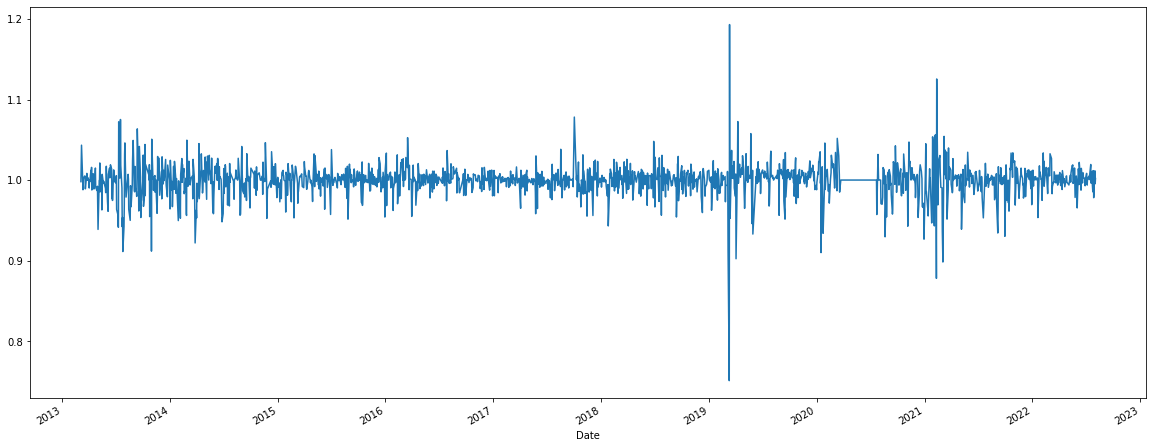

In [19]:
df['Change'] = df.High.div(df.High.shift())
df['Change'].plot(figsize=(20,8))

#Stockes returns

<AxesSubplot:xlabel='Date'>

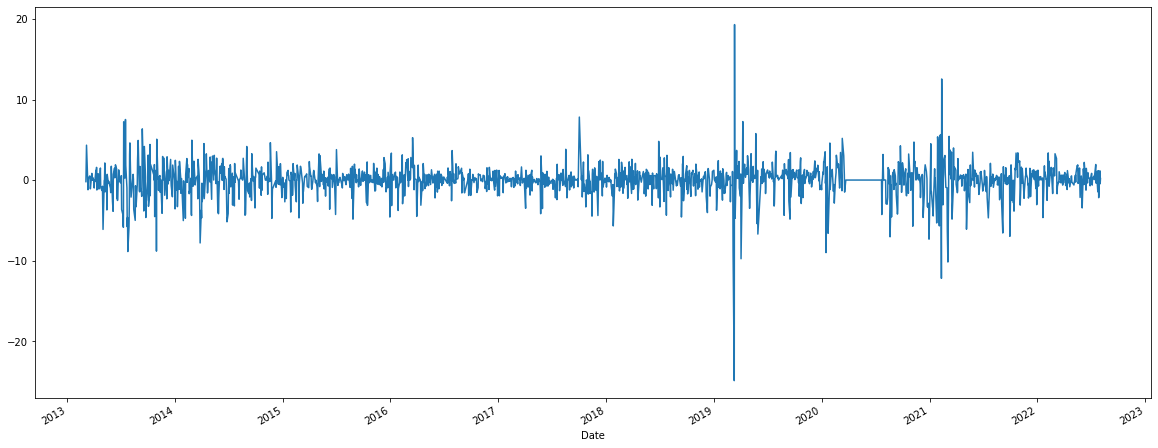

In [20]:
df['Return'] = df.Change.sub(1).mul(100)
df['Return'].plot(figsize=(20,8))

<AxesSubplot:xlabel='Date'>

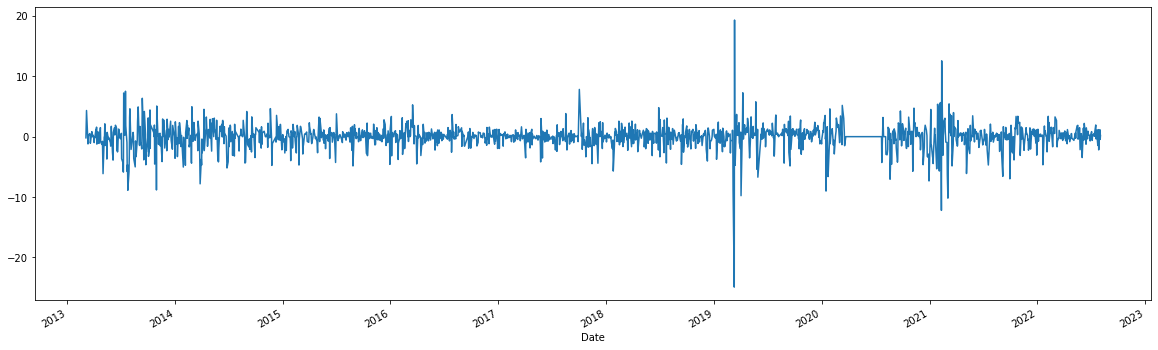

In [21]:
df.High.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns

#Absolute change in successive rows

<AxesSubplot:xlabel='Date'>

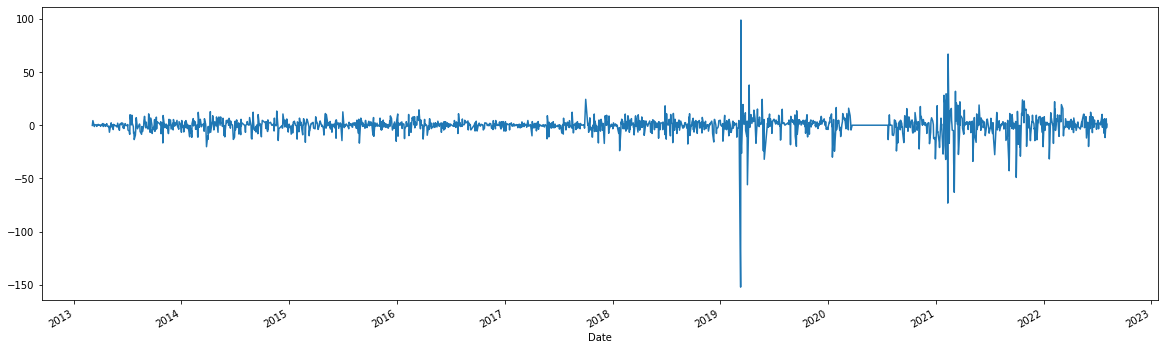

In [22]:
df.High.diff().plot(figsize=(20,6))

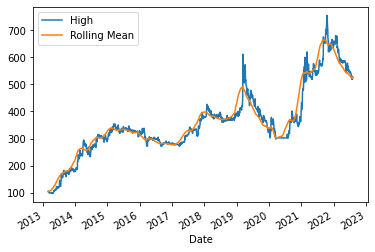

In [23]:
rolling_df = df.High.rolling('90D').mean()
df.High.plot()
rolling_df.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

#OHLC charts

In [24]:
from plotly.offline import init_notebook_mode, iplot

In [25]:
from pylab import rcParams

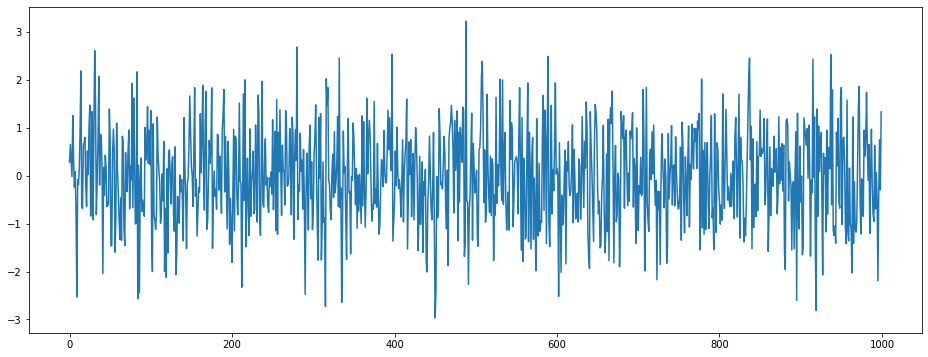

In [26]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

In [27]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

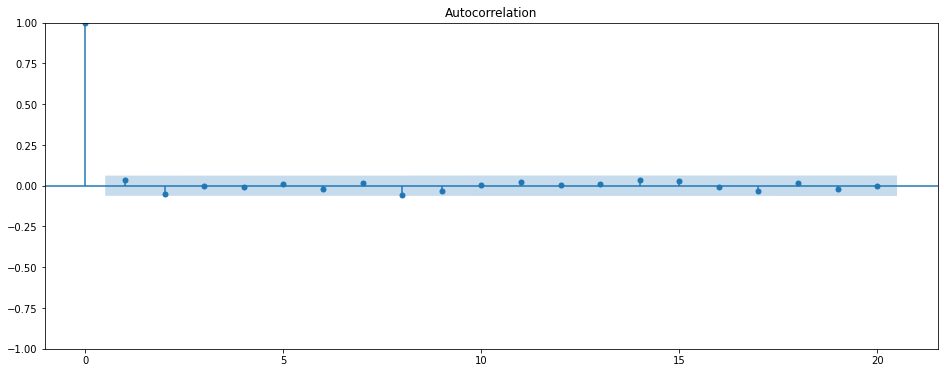

In [29]:
plot_acf(white_noise,lags=20)
plt.show()

#Augmented Dickey-Fuller test

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'Return'], dtype='object')

In [32]:
adf = adfuller(df["Volume"])
print("p-value of this stock: {}".format(float(adf[1])))

p-value of this stock: 2.8595383689415277e-06


#Generating Random Walk

In [33]:
pip install iplot 

Note: you may need to restart the kernel to use updated packages.


In [34]:
from numpy.random import normal, seed

import plotly.figure_factory as ff

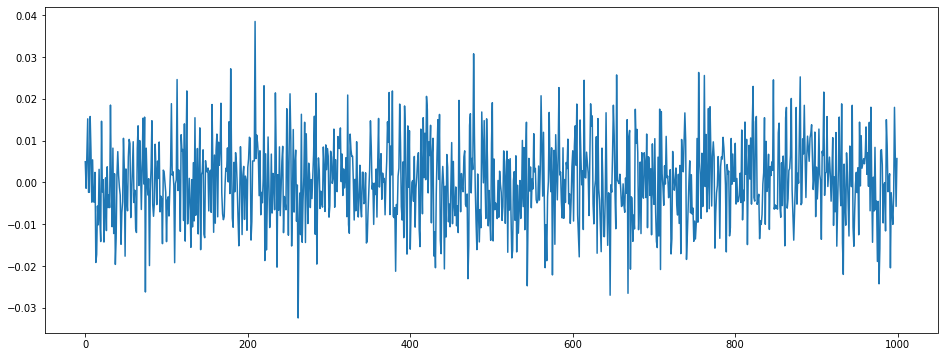

In [35]:
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

#Simulating AR(1) model

In [36]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

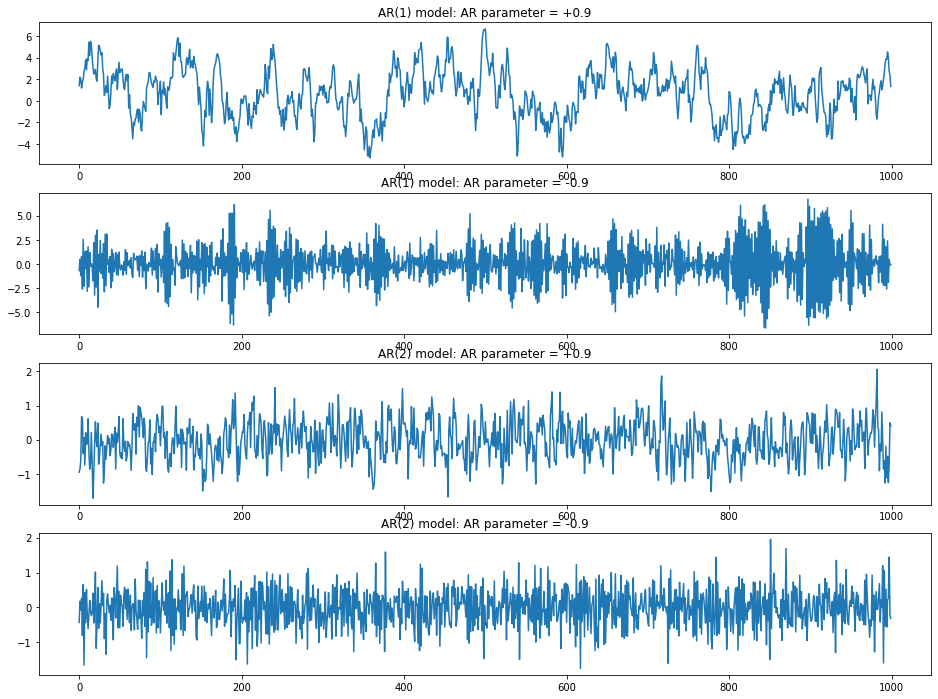

In [37]:
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

In [38]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [39]:
from pmdarima import auto_arima
import warnings

warnings.filterwarnings("ignore")

In [40]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

In [41]:
stepwise_fit=auto_arima(sim1,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2841.813, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4425.165, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2837.403, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3620.717, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4518.064, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2839.324, Time=0.48 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2839.323, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2841.387, Time=0.45 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2840.874, Time=0.13 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.880 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1415.701
Date:                Sun, 14 Aug 2022   AIC                           2837.403
Time:                        12:31:06   BIC                           2852.126
Sample:                             0   HQIC                          2842.998
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0767      0.032      2.384      0.017       0.014       0.140
ar.L1          0.8916      0.015     60.957      0.000       0.863       0.920
sigma2         0.9920      0.044     22.667      0.000       0.906       1.078
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.83   Prob(JB):                         0.72
Heteroskedasticity (H):               0.92   Skew:                            -0.06
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
model = ARIMA(sim1, order=(1,0,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1415.701
Date:                Sun, 14 Aug 2022   AIC                           2837.403
Time:                        12:31:06   BIC                           2852.126
Sample:                             0   HQIC                          2842.998
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7072      0.293      2.417      0.016       0.134       1.281
ar.L1          0.8916      0.015     60.958      0.000       0.863       0.920
sigma2         0.9920      0.044     22.667      0.0

In [43]:
import math 
from sklearn.metrics import mean_squared_error

In [44]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0408056511726917.


In [45]:
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1736, 7) (30, 7)


In [53]:
start=len(train)
end=len(train)+len(test)-1
pred=result.predict(start=start, end=end,type='levels')
#pred.index=df.index[start:end+1]
print(pred)


[0.7072413 0.7072413 0.7072413 0.7072413 0.7072413 0.7072413 0.7072413
 0.7072413 0.7072413 0.7072413 0.7072413 0.7072413 0.7072413 0.7072413
 0.7072413 0.7072413 0.7072413 0.7072413 0.7072413 0.7072413 0.7072413
 0.7072413 0.7072413 0.7072413 0.7072413 0.7072413 0.7072413 0.7072413
 0.7072413 0.7072413]
